#  <span style="color:BLUE">IMPORTACIÓN DE LIBRERIAS</span>

In [1]:
import tarfile
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np
from time import time

#  <span style="color:BLUE">CARGA DEL DATASET (50000K DE IMÁGENES)</span>




In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



170500096/170498071 [==============================] - 2s 0us/step


#  <span style="color:BLUE">NORMALIZACIÓN DEL DATASET (MAX-MIN)</span>

In [3]:
def normalize(x):
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

x_train =normalize(x_train) 
x_test =normalize(x_test)


#  <span style="color:BLUE">CREACIÓN DEL MODELO</span>

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#  <span style="color:BLUE">ENTRENAMIENTO DEL MODELO</span>

In [5]:
start_time = time()
history = model.fit(x_train, y_train, batch_size= 128, epochs=10 , validation_data=(x_test, y_test), verbose=1)
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

Epoch 1/10
391/391 [==============================] - 11s 28ms/step - loss: 1.8051 - accuracy: 0.3051 - val_loss: 1.4812 - val_accuracy: 0.4552
Epoch 2/10
391/391 [==============================] - 10s 26ms/step - loss: 1.3727 - accuracy: 0.4970 - val_loss: 1.1790 - val_accuracy: 0.5748
Epoch 3/10
391/391 [==============================] - 10s 26ms/step - loss: 1.1723 - accuracy: 0.5809 - val_loss: 1.0015 - val_accuracy: 0.6384
Epoch 4/10
391/391 [==============================] - 10s 26ms/step - loss: 1.0391 - accuracy: 0.6308 - val_loss: 0.9287 - val_accuracy: 0.6681
Epoch 5/10
391/391 [==============================] - 10s 26ms/step - loss: 0.9556 - accuracy: 0.6606 - val_loss: 0.8471 - val_accuracy: 0.7011
Epoch 6/10
391/391 [==============================] - 10s 26ms/step - loss: 0.8876 - accuracy: 0.6871 - val_loss: 0.8040 - val_accuracy: 0.7149
Epoch 7/10
391/391 [==============================] - 10s 27ms/step - loss: 0.8333 - accuracy: 0.7085 - val_loss: 0.7595 - val_accuracy:

#  <span style="color:BLUE">RESULTADOS DE LA EVALUACIÓN</span>

In [6]:
test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 2s 6ms/step - loss: 0.6857 - accuracy: 0.7619
Test loss 0.6857, accuracy 76.19%


#  <span style="color:BLUE">GRÁFICA DE LA EVALUACIÓN Y ENTRENAMIENTO ACC</span>

Text(0, 0.5, 'acc')

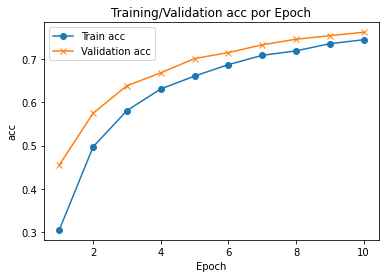

In [7]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['accuracy'], 'o-')
ax.plot([None] + history.history['val_accuracy'],'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

#  <span style="color:BLUE">GRÁFICA DE LA EVALUACIÓN Y ENTRENAMIENTO LOSS</span>

Text(0, 0.5, 'Loss')

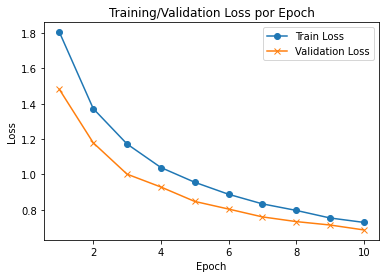

In [8]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'], 'o-')
ax.plot([None] + history.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss por Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')